In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from pathlib import Path
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
# Loading data
file_path = Path("Resources/myopia.csv")
df_myopia = pd.read_csv(file_path)
df_myopia = df_myopia.drop({'MYOPIC'}, axis = 1)
df_myopia.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [3]:
# Standarize data with StandarScaler
myopia_scaled = StandardScaler().fit_transform(df_myopia)
print(myopia_scaled[0:5])

[[-0.42021911 -1.3639169  -0.89286146  0.48378402 -0.28144315 -1.0197916
   4.1506609   1.69744958 -0.68931054 -0.67299591  0.18405806  0.49830393
   0.98713773  1.0032415 ]
 [-0.42021911 -0.30861224 -0.1718398   0.53591028 -0.96799728 -0.13076253
  -0.99889822 -0.91206246 -0.36187479 -0.22140908 -0.34093217 -0.87508755
   0.98713773  1.0032415 ]
 [-0.42021911  0.60438629 -0.00997682 -0.5066285  -0.17781207  0.21580879
   0.25709181 -0.91206246 -0.03443904 -0.67299591  0.18405806 -0.75023378
  -1.01302987 -0.99676897]
 [-0.42021911 -0.4413248  -0.43670267  1.23093648  0.4569273  -0.97458715
   0.75948782  2.6760166  -0.68931054 -0.67299591 -0.86592239  0.68558458
  -1.01302987  1.0032415 ]
 [-1.82397807 -0.16630592  1.16720365  0.42296952 -0.56642745  1.18017813
   0.25709181 -0.91206246 -0.68931054 -0.67299591 -0.86592239 -1.37450264
   0.98713773 -0.99676897]]


In [4]:
# Initialize PCA model
pca = PCA(n_components=0.90)

# Get two principal components for the iris data.
myopia_pca = pca.fit_transform(myopia_scaled)

In [5]:
tsne = TSNE(learning_rate=35)

In [6]:
tsne_features = tsne.fit_transform(myopia_scaled)

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [7]:
# The dataset has 2 columns
tsne_features.shape

(618, 2)

In [8]:
# Prepare to plot the dataset

# The first column of transformed features
df_myopia['x'] = tsne_features[:,0]

# The second column of transformed features
df_myopia['y'] = tsne_features[:,1]

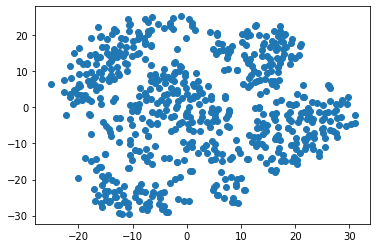

In [9]:
# Visualize the clusters
plt.scatter(df_myopia['x'], df_myopia['y'])
plt.show()

## Are there distinct clusters? 
I can see distinct clusters, but clearly it looks a little clustered all together.
I would be able to destingish 4 large clusters and 2 smaller ones. 

In [10]:
df_myopia.value_counts()

AGE  SPHEQ   AL         ACD    LT     VCD    SPORTHR  READHR  COMPHR  STUDYHR  TVHR  DIOPTERHR  MOMMY  DADMY  x           y         
5    -0.129  22.940001  3.836  3.252  15.85  20       0       0       0        4     4          1      0       1.206118   -6.499463     1
6     1.362  21.799999  3.410  4.112  14.27  15       0       2       0        6     10         1      0      -6.557273    11.729136    1
      1.332  21.760000  3.198  3.668  14.89  20       3       2       1        10    26         1      0      -7.519072    3.050779     1
      1.334  21.820000  3.436  3.612  14.77  8        2       1       2        3     17         1      1       27.131119  -1.196750     1
      1.340  21.200001  3.330  3.266  14.60  20       0       1       0        10    12         1      1       31.016479  -4.484441     1
                                                                                                                                       ..
      0.681  22.540001  3.582  3.752  1

In [11]:
inertia = []
k = list(range(1, 10))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_myopia)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,472573.518906
1,2,308379.565307
2,3,231541.402360
3,4,201309.112371
4,5,177342.985638


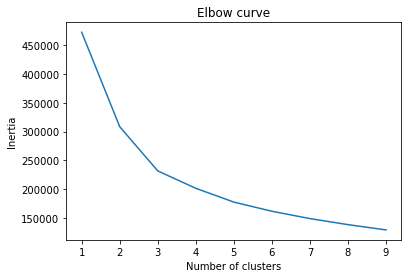

In [12]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,10))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve')
plt.show()

In [13]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["myopia"] = model.labels_

    return data

In [14]:
clusters = get_clusters(5, df_myopia)

In [15]:
clusters

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,x,y,myopia
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,-7.251549,-7.999969,0
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,22.187433,-8.506682,4
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,-16.184181,9.705713,1
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,6.871718,10.231582,2
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0.489885,-5.889508,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0,3.929580,5.840055,2
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1,21.640972,-8.791110,4
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1,20.182484,-8.630148,4
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0,-10.764206,21.143017,1


In [16]:
def show_clusters(df):
    plt.scatter(df['x'], df['y'], c=df['myopia'])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

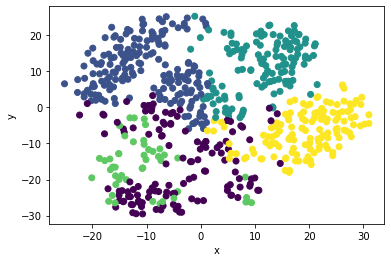

In [17]:
show_clusters(clusters)

In [18]:
def show_clusters(df):
    plt.scatter(df['SPORTHR'], df['READHR'], c=df['myopia'])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

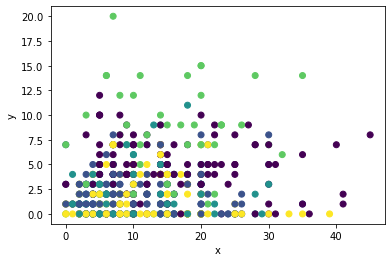

In [19]:
show_clusters(clusters)

## Conclusion 

#### Can patients be clustered together?

Based on the original scatter plot of the myopia data which was later illustrated as the x and y data column we can see that the patients can be clustered. Although my initial thought was off as to how many distinct clusters, I thought there were just 4 groups. I would tell my supervisor that we could test further to possibly make those groups more distinct. The second graph was just for fun to test a scatter plot on different columns. 